In [86]:
import os
import numpy as np
import scipy.misc as smp
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


In [87]:
file_name = 'six_dim.dat'
Data = {}
with open(file_name) as f:
    lines = [line for line in f]
    for x in lines:
        info = x.strip().split('=')
        ind = tuple([float(y) * 10 for y in info[0][1:-2].split(',')])
        val = tuple([float(y) for y in info[1][2:-1].split(',')])
        Data[ind] = val


In [125]:
#[alpha, b, lambda, m, delta, rho]

def one_graph(Data,others,pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    #others = [a,b,c,-1,d,-1]
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$',r'$\rho$']
    two_dim = [index for index,value in enumerate(others) if value == -1]
    
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
        
        col = []
        for i in range(3):
            col.append(0.95 if Data[ind][i] != 0 else 0.2)
#            col.append(Data[ind][i])
        pinfo.scatter(ind[two_dim[0]],ind[two_dim[1]],marker='s', color = tuple(col),linewidth=20)
    if need_x:
        pinfo.set_xlabel( Labels[two_dim[0]] + '\n' + xinfo)
    if need_y:
        pinfo.set_ylabel( Labels[two_dim[1]], rotation = 0)
        if two_dim[1] == 1:
            pinfo.text(-0.5,1.5,yinfo )            
        else:
            pinfo.text(-0.5,0.5,yinfo )

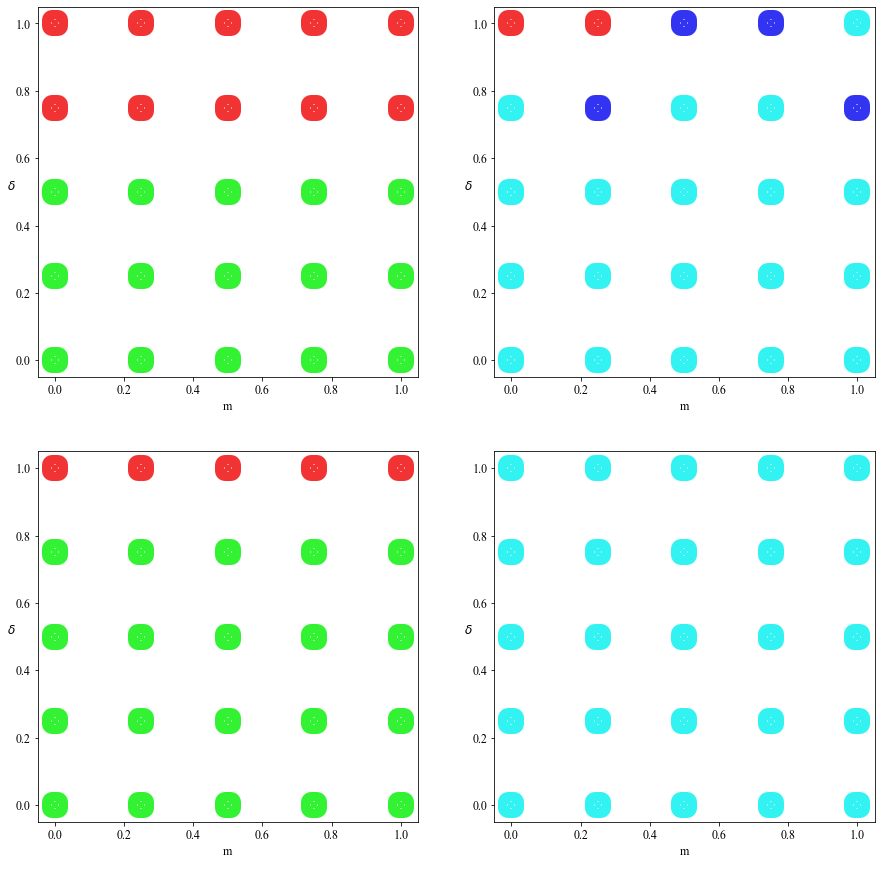

In [126]:
#one_graph(Data,[0,1,0,-1,-1,0],plt)

fig, axs = plt.subplots(2,2)
one_graph(Data,[0,1,0,-1,-1,0],axs[0,0])
one_graph(Data,[0,1,0,-1,-1,1],axs[0,1])
one_graph(Data,[0,1,1,-1,-1,0],axs[1,0])
one_graph(Data,[0,1,1,-1,-1,1],axs[1,1])



In [127]:
def all_five(Data,info):
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$','r']    
    #info = [-1,-1,-1,a,b,-1]
    fig = plt.figure()
    gs = fig.add_gridspec(5, 5, hspace=0.02, wspace=0.02)
    axs = gs.subplots(sharex='col', sharey='row')
        
    last_two = [index for index,value in enumerate(info) if value == -1][-2:]

    for i in range(5):
        for j in range(5):
            new_info = info.copy()
            new_info[last_two[0]] = i * 0.25
            new_info[last_two[1]] = j * 0.25
            need_x = (i == 4)
            need_y = (j == 0)
            
            y_info = Labels[last_two[0]] + '=' + str(i * 0.25)
            x_info = Labels[last_two[1]] + '=' + str(j * 0.25)
            
            one_graph(Data,new_info,axs[i,j],need_x, need_y,x_info, y_info)
    

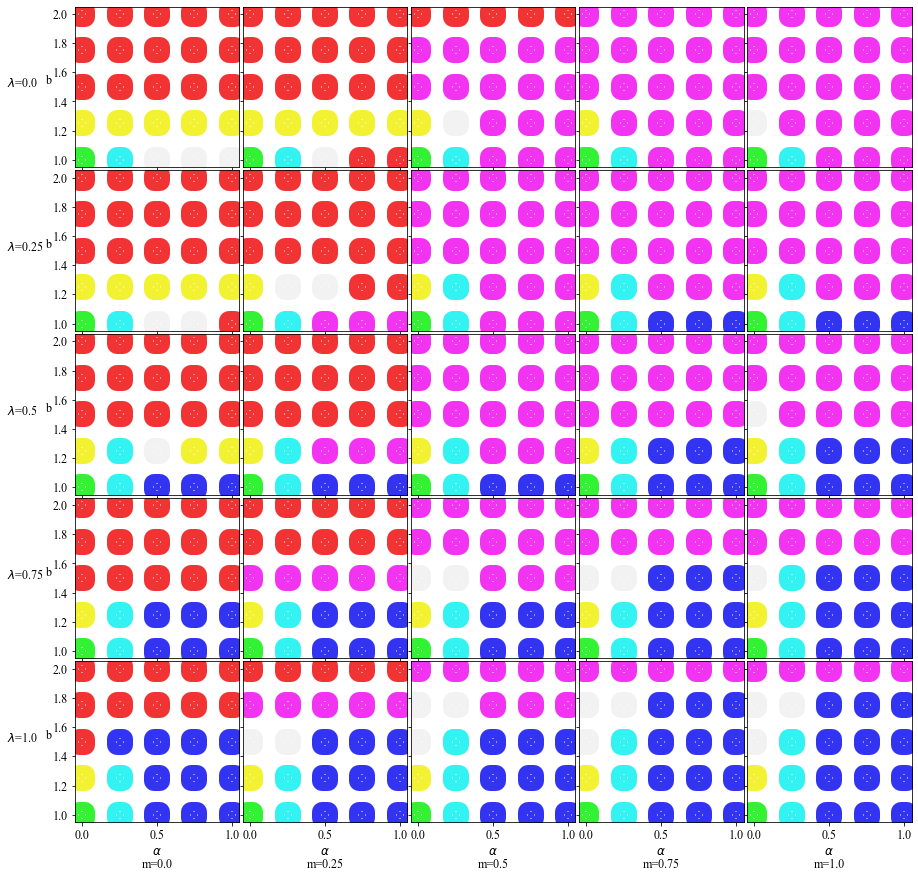

In [145]:
#[alpha, b, lambda, m, delta, rho]
D = 0.25
r = 0.5
info_list = [-1,-1,-1,-1,D,r]
all_five(Data, [-1,-1,-1,-1,0.25,0.5])
plt.savefig('D{:03.0f}R{:03.0f}.png'.format(100*D,100*r), dpi=200)

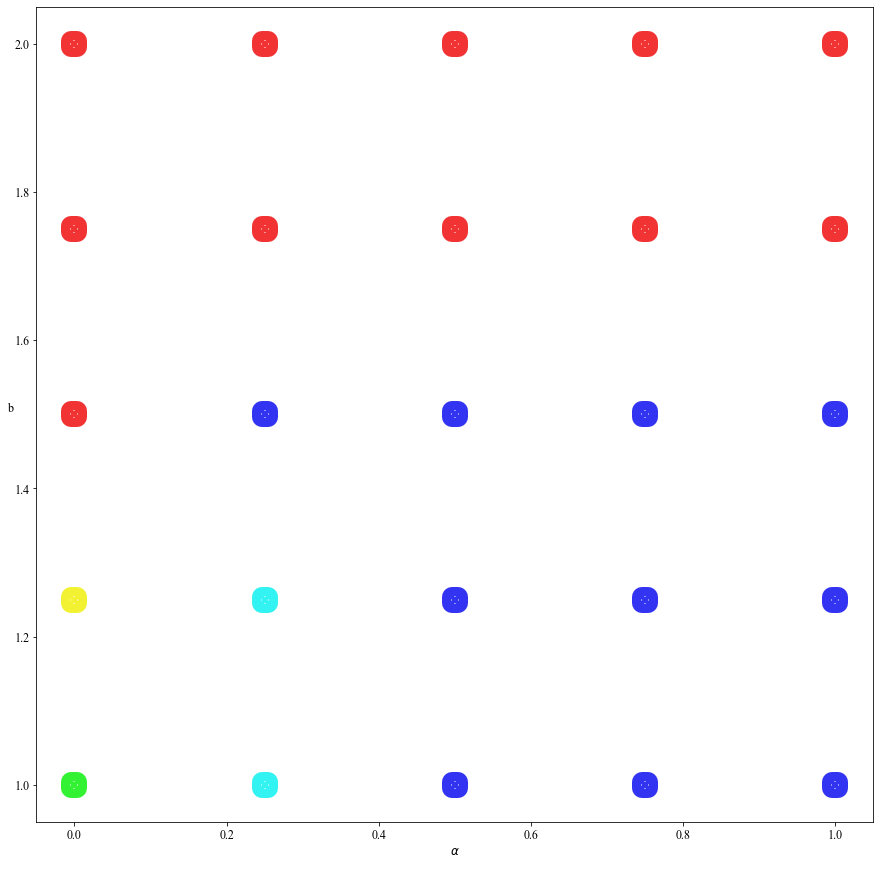

In [129]:
fig, axs = plt.subplots(1)
one_graph(Data,[-1,-1,1.0,0,0.25,0.5],axs)

In [143]:
f = 0.05

'{:03.0f}'.format(100 * f)

'005'